# Create an ESN for sepsis shared features

## Exploration of a single ICU sepsis data log

In [132]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
%matplotlib inline

In [2]:
path = '../training/'

In [3]:
# Choose patient sample
sample_num = 200

In [4]:
# Import and print dataframe layout
def loadICUdata(sample_num, path = './', printdf = False):
    samplestr = 'p' + (str(sample_num) + '.psv').rjust(9, '0')
    fname = path + samplestr
    df = pd.read_csv(fname, sep = '|')
    #print(fname, ' file:')
    if printdf:
        print(df)
    return df

In [5]:
df = loadICUdata(sample_num, path, False)

In [6]:
#df

## Check sepsis labels for ALL patients

In [7]:
# get the sepsis label value
def get_sepsislabel(df):
    sl = df[["SepsisLabel"]]
    count = df['SepsisLabel'].value_counts()
    count_healthy = -1
    count_sep = -1
    
    if len(count) == 2:
        count_sep = count[1]
        count_healthy = count[0]
        
    elif len(count) == 1:
        if sl.values[0] == 0:
            count_healthy = count.values[0]
        elif sl.values[0] == 1:
            count_sep = count.values[0]
    return sl, count_healthy, count_sep


In [8]:
count = df['SepsisLabel'].value_counts()
count.values
len(count)
sl, ch, cs = get_sepsislabel(df)
len(sl)

14

In [9]:
# Print result
sl, ch, cs = get_sepsislabel(df) 
print('patient {:d}, {:d} {:d} {:2.2f}%'.format(sample_num, ch, cs, 100*cs/len(sl)))

patient 200, 14 -1 -7.14%


## Loop study

In [10]:
# Run in a loop and get a sepsis presence report
SL = []    #Sepsis labels
CH = []    #Healthy hours count
CS = []    #Sepsis hours count
CSCH = []  #Percentage cs/(cs+ch)
DATA = []  #DATA structure
for i in range(1,5001):
    df = loadICUdata(i, path, False)
    DATA.append(df) 
    sl, ch, cs = get_sepsislabel(df) 
    SL.append(sl)
    CH.append(ch)
    CS.append(cs)
    if cs != -1 and ch != -1:
        csch = 1.0*cs/(cs + ch)
    elif cs == -1:
        csch = 0
    elif ch == -1:
        csch = 1
    CSCH.append(csch)
    
CSCH = np.array(CSCH)

In [11]:
# Count sepsis patients
print(CSCH, np.count_nonzero(CSCH))

[ 0.  0.  0. ...,  0.  0.  0.] 279


In [12]:
sepsis_idx = np.where(CSCH!=0)

In [13]:
# Check percentage of sepsis hours for sepsis patients
CSCH[sepsis_idx]

array([ 0.11111111,  0.02214022,  0.27777778,  0.11363636,  1.        ,
        0.09615385,  0.28571429,  0.33333333,  0.25641026,  0.14754098,
        1.        ,  0.2195122 ,  1.        ,  0.07627119,  0.04975124,
        0.15151515,  0.09183673,  0.37037037,  0.20408163,  0.06944444,
        0.04587156,  0.625     ,  0.07894737,  0.09183673,  0.24390244,
        1.        ,  0.03846154,  0.2       ,  0.10465116,  0.76923077,
        0.76923077,  0.27777778,  0.225     ,  0.17857143,  1.        ,
        0.08256881,  0.20408163,  0.16981132,  0.14084507,  0.81818182,
        0.0990099 ,  0.43478261,  0.12820513,  0.09803922,  0.33333333,
        0.13461538,  0.41666667,  1.        ,  0.11627907,  0.08333333,
        0.23255814,  0.66666667,  0.29411765,  1.        ,  0.90909091,
        0.38461538,  0.03125   ,  0.07246377,  0.04291845,  0.20833333,
        1.        ,  0.16393443,  0.90909091,  0.22727273,  1.        ,
        0.33333333,  0.13888889,  0.4       ,  0.35714286,  0.25

## Matrix Sepsis

In [14]:
def get_dfmaxcount(list_of_lists):
    maxval = -1
    maxval_i = -1
    for i in range(len(list_of_lists)):
        val = list_of_lists[i].count(axis = 0)[0]
        if val > maxval:
            maxval = val
            maxval_i = i
    return maxval, maxval_i

In [15]:
# get max val in SepsisLabel count and idx position
mv, mvi = get_dfmaxcount(SL)

In [16]:
mv, mvi

(336, 1921)

In [17]:
# Initialize sepsis matrix
sepsis_matrix = -1 * np.ones((len(SL),mv), dtype=int)
for i in range(len(SL)):
    sepsis_matrix[i][0:(SL[i].count(axis = 0)[0])] = (SL[i].values).flatten()
np.shape(sepsis_matrix)

(5000, 336)

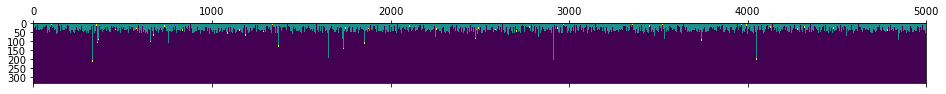

In [18]:
plt.matshow(np.transpose(sepsis_matrix))

## Matrix display 1000 by 1000

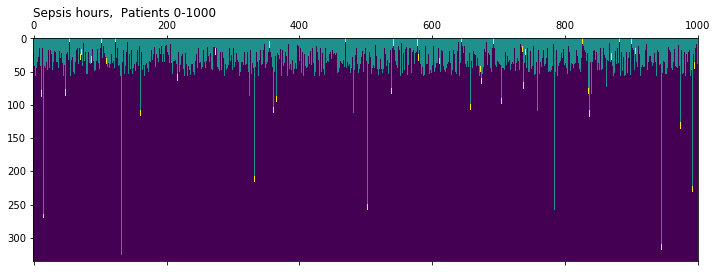

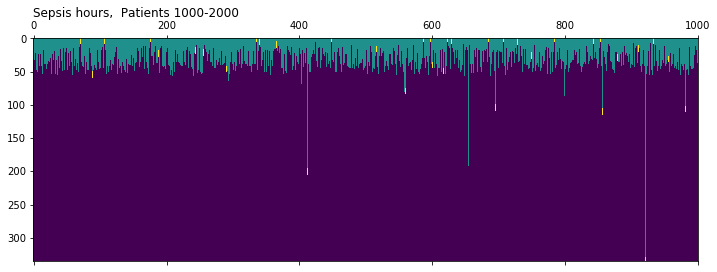

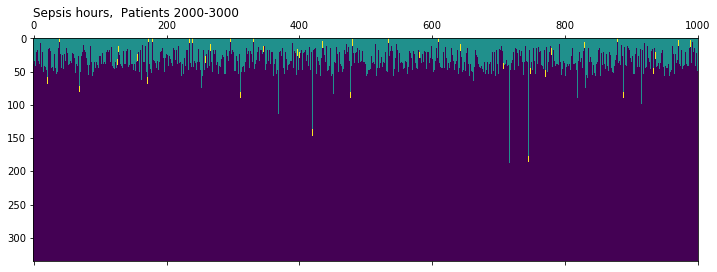

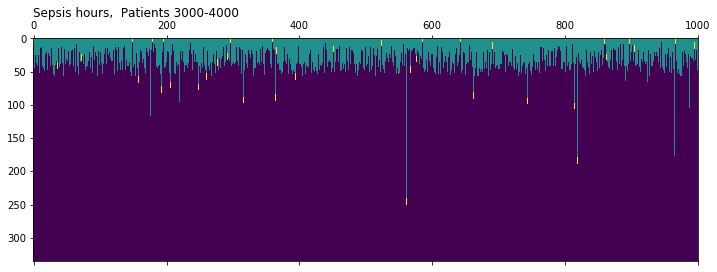

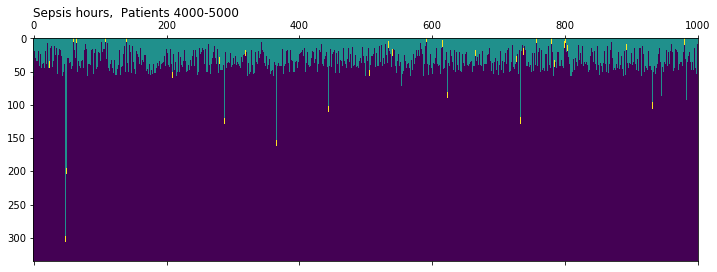

In [19]:
step = 1000
for i in range(int(len(SL)/step)):
    plt.matshow(np.transpose(sepsis_matrix[i*step:(i+1)*step]))
    plt.title("Sepsis hours,  Patients " + str(i*step) + "-" + str(i*step+step)+"\n",loc='left')

## Sepsis patients only

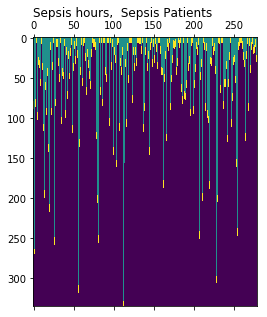

In [20]:
plt.matshow(np.transpose(sepsis_matrix[sepsis_idx]))
plt.title("Sepsis hours,  Sepsis Patients \n",loc='left')

## Matrix Sepsis (from last hours perspective, reversed)

In [21]:
# Initialize sepsis matrix
sepsis_matrix_last = -1 * np.ones((len(SL),mv), dtype=int)
for i in range(len(SL)):
    sepsis_matrix_last[i][-(SL[i].count(axis = 0)[0]):] = (SL[i].values).flatten()
np.shape(sepsis_matrix_last)

(5000, 336)

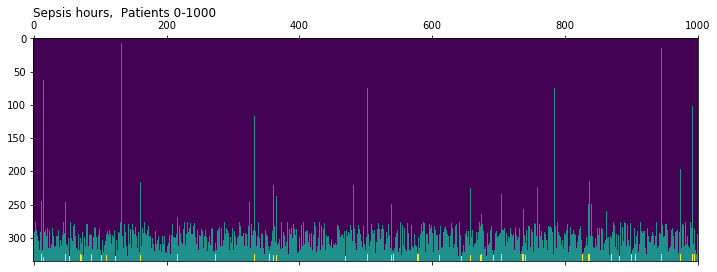

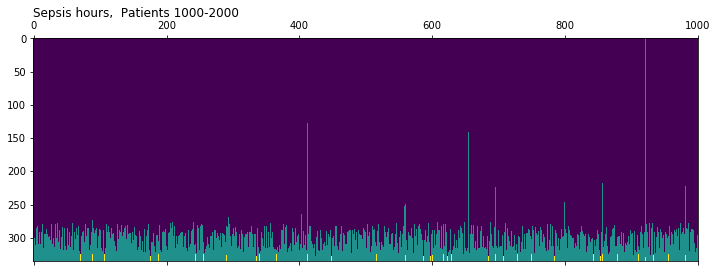

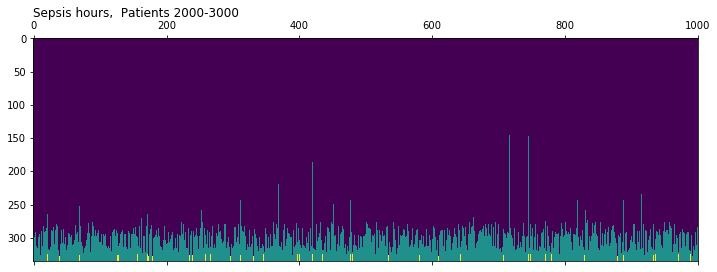

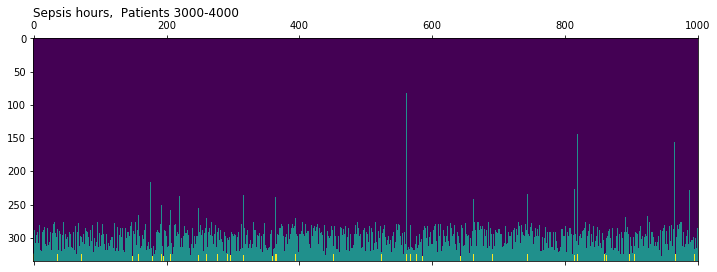

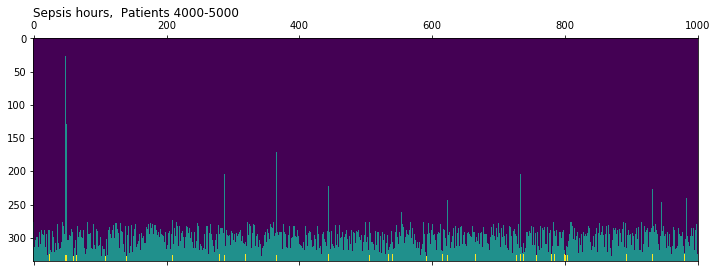

In [22]:
step = 1000
for i in range(int(len(SL)/step)):
    plt.matshow(np.transpose(sepsis_matrix_last[i*step:(i+1)*step]))
    plt.title("Sepsis hours,  Patients " + str(i*step) + "-" + str(i*step+step)+"\n",loc='left')

## Focus on sepsis patients, last nhours

In [23]:
sepsis_matrix_pos = sepsis_matrix_last[sepsis_idx[0]]

In [24]:
nhours = 50

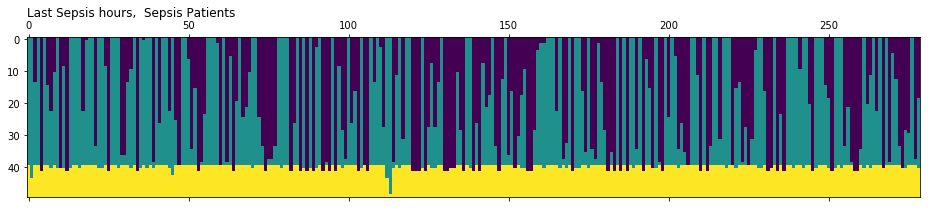

In [25]:
plt.matshow(np.transpose(sepsis_matrix_pos[:,-nhours:]))
plt.title("Last Sepsis hours,  Sepsis Patients \n",loc='left')

## Sepsis keys for the ESN

In [26]:
sepsis_idx = np.where(CSCH!=0)
healthy_idx = np.where(CSCH==0) 

In [27]:
# We use features (9) shared by all sepsis patients
s_keys = {}
s_keys = ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Age', 'Gender', 'HospAdmTime', 'ICULOS'] #, 'SepsisLabel']
type(s_keys)
len(s_keys)

9

In [28]:
sepsis_idx[0][int(len(sepsis_idx[0])/2)]

2331

In [29]:
healthy_idx[0][int(len(healthy_idx[0])/2)]

2512

In [30]:
DATA[0]["HR"].values

array([   nan,   93. ,   91. ,   93. ,   93. ,    nan,   91.5,   94. ,
         94. ,  102. ,  106. ,  107. ,  102. ,   98. ,   95. ,  105. ,
         94. ,   98. ,   98. ,  105. ,   96. ,  102. ,  105. ,  107. ])

In [31]:
# Feature matrix
feature_matrix = []
patient = []
sepsis_label = []
for i in range(5000):
    initval = 0
    A = initval * np.ones((DATA[i].shape[0],len(s_keys)), dtype=np.double)
    j = 0
    for key in s_keys:
        A[:,j] = DATA[i][key].values
        j = j + 1
       # print (i, key, j)
    A = np.nan_to_num(A)
    sep_lab = (DATA[i]["SepsisLabel"].values).reshape(-1,1)
    if i==0:
        feature_matrix=(A)
        patient = i*np.ones((DATA[i].shape[0],1),dtype=np.int)
        sepsis_label = sep_lab
        
    else: 
        feature_matrix = np.vstack((feature_matrix, A))
        patient = np.vstack((patient, i*np.ones((DATA[i].shape[0],1),dtype=np.int)))
        sepsis_label = np.vstack((sepsis_label, sep_lab))

In [32]:
type(feature_matrix[0])

numpy.ndarray

In [33]:
feature_matrix
np.shape(feature_matrix)

(188453, 9)

In [34]:
# Keep a raw copy
raw_feature_matrix = np.copy(feature_matrix)

In [35]:
patient
np.shape(patient)

(188453, 1)

In [36]:
sepsis_label
np.shape(sepsis_label)

(188453, 1)

In [37]:
# Single entry example
i_e = 90000
print(patient[i_e])
print(feature_matrix[i_e,:])
print(sepsis_label[i_e])


[2378]
[  89.     98.    120.     70.     50.     62.      0.     -1.38   22.  ]
[0]


In [38]:
#offset = 500
#plt.matshow(feature_matrix[offset:offset+100,:])

## Preprocess features (log(-HospAdmTime-1))

In [47]:
feature_matrix= np.copy(raw_feature_matrix)
feat_i = s_keys.index('HospAdmTime')

In [48]:
print(np.min(raw_feature_matrix[:,feat_i]), np.max(raw_feature_matrix[:,feat_i]))
# for i in range(len(raw_feature_matrix[:,feat_i])):
#     print(raw_feature_matrix[i,feat_i])

-5366.86 0.0


7

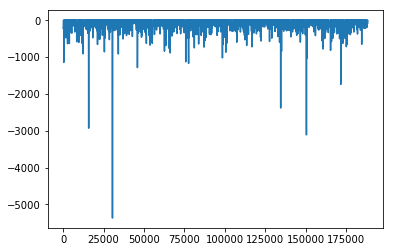

In [49]:
plt.plot(feature_matrix[:,7])
feat_i

In [50]:
change_i = np.where(raw_feature_matrix[:,feat_i]!=np.nan)[0]
print(len(change_i))
change_i

188453


array([     0,      1,      2, ..., 188450, 188451, 188452], dtype=int64)

In [85]:
feature_matrix[change_i,feat_i] = np.log(1-np.copy(raw_feature_matrix[change_i,feat_i]))
# for i in range(len(change_i)):
for i in range(100):
    print(feature_matrix[change_i[i],feat_i])

5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
5.37361035058
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
4.82165159443
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.34286480319
1.3428

4.83834327294
4.83834327294
4.83834327294
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
4.5460569215
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.02906442956
5.0290644

1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.58719230349
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
1.23256026118
3.54558628429
3.54558628429
3.54558628429
3.54558628429
3.54558628429
3.54558628429
3.54558628429
3.5455

1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
1.70837786029
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
3.24726889937
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.37371557891
1.3737

1.19996478293
1.19996478293
1.19996478293
1.19996478293
1.19996478293
1.19996478293
1.19996478293
1.19996478293
1.19996478293
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672715
1.26412672

0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
0.657520002917
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
6.8171848488
3.870992655

1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
1.01160091168
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
4.89724260674
1.44926916028
1.44926916028
1.44926916028
1.44926916028
1.44926916028
1.4492

0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.58684672855
3.

1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.85002837735
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.3244189574
1.324418

1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.05779029415
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
2.45186679571
2.45186679571
2.45186679571
2.45186679571
2.45186679571
2.45186679571
2.45186679571
2.4518

4.17454110422
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
2.0541237337
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.095310179

0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
0.131028262406
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
1.82616089595
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.03900801718
4.039008017

0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
1.96990565461
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.1377104498
2.137

4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
4.76873356985
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.02431973041
3.0243

6.23050113242
6.23050113242
6.23050113242
6.23050113242
6.23050113242
6.23050113242
6.23050113242
6.23050113242
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.20639830336
3.91681152216
3.91681152216
3.91681152216
3.91681152216
3.91681152216
3.91681152216
3.91681152216
3.91681152216
3.9168

4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
4.60995870272
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
1.71918877639
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.97700956645
4.97700956645
4.97700956645
4.97700956645
4.9770

2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.44321622273
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
2.36085400112
6.09042713963
6.0904

5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
5.58672417631
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
1.80500469598
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.00148000021
2.00148000021
2.00148000

4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
4.76260119394
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.34372703633
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.75684036527
2.7568

5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
5.77851882077
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
3.53601960747
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.50185270175
1.5018

3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.87701739623
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
3.54990470182
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
1.363537374
5.96893771253
5.96893771253
5.96893771253
5.96893771253
5.96893771253
5.96893771253
5.96893771253
5.9689377125

1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.26976054486
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.72988406551
1.7298

4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
4.81470150988
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
1.51292701205
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043


4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
4.26829786935
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.

5.0856190731
5.0856190731
5.0856190731
5.0856190731
5.0856190731
5.0856190731
5.0856190731
5.0856190731
5.0856190731
5.0856190731
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
2.32336763218
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75267208052
1.75

2.07693841146
2.07693841146
2.07693841146
2.07693841146
2.07693841146
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
2.00552585873
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487

1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
1.47932922709
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
3.10099278421
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.0392207131533
0.03

1.84530023616
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
1.5368672196
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.83902211254
3.8

0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
0.0198026272962
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
4.02713581253
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999295
3.36210999

3.51124688681
3.51124688681
3.51124688681
3.51124688681
3.51124688681
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
3.0407056392
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695123273
1.73695

2.61593491219
2.61593491219
2.61593491219
2.61593491219
2.61593491219
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
2.09679018001
2.09679018001
2.09679018001
2.09679018001
2.09679018001
2.09679018001
2.09679018001
2.09679018001
2.09679018001
2.09679018001
2.096790

2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.58776403523
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.6166656393
2.616665

0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
0.139761942375
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.07191327526
2.0719132

0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
0.940007258491
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165958
1.93874165

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
2.85761897142
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.23317312957
3.

4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
4.79777205219
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
2.33214389524
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.59127394181
1.591273

1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
1.54329810993
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.17019590495
2.1701

1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
1.62924053973
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
2.62321826559
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.67490277511
5.6749

0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
4.03953632573
1.20297230399
1.20297230399
1.20297230399
1.20297230399
1.20297230399
1.20297230399
1.20297230399
1.20297230399
1.20297230399


0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
3.61926138723
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.530628251062
0.53062825

2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
2.2752138962
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.14845336057
3.148453

4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
4.62507084769
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.8547

1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.43031124654
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.1600209168
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.36863942588
1.368639

4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
4.24992279404
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.08511583469
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.45852244828
3.4585

1.75613229158
1.75613229158
1.75613229158
1.75613229158
1.75613229158
1.75613229158
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
2.5771819259
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
3.49711343849
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.44691898294
1

3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
3.27146827499
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.6483001967
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.7166795278
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.24283508859
2.2428

1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.22082992139
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.79840401195
1.54756250872
1.54756250872
1.54756250872
1.54756250872
1.54756250872
1.54756250872
1.54756250872
1.54756250872
1.54756250872
1.5475

0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118
1.80828877118


2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.1736147117
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697
2.0307763697

2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
2.86448398694
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.36284026256
5.3628

2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.52732736567
2.5273

1.8484548129
1.8484548129
1.8484548129
1.8484548129
1.8484548129
1.8484548129
1.8484548129
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
0.15700374881
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441
4.21286806441

3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
3.16800349449
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.0676586484738
0.067658

1.91397710195
1.91397710195
1.91397710195
1.91397710195
1.91397710195
1.91397710195
1.91397710195
1.91397710195
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.49514876603
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
1.47247205736
0.0676

1.73342389222
1.73342389222
1.73342389222
1.73342389222
1.73342389222
1.73342389222
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
1.25846098961
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264467
0.262364264

5.25962851193
5.25962851193
5.25962851193
5.25962851193
5.25962851193
5.25962851193
5.25962851193
5.25962851193
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
1.86717610851
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.76157957338
5.7615

1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.0952733874
1.83896107071
1.83896107071
1.83896107071
1.83896107071
1.83896107071
1.83896107071
1.83896107071
1.83896107071
1.83896107071
1.83896107071
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
0.37843643572
4.99056863195
4.99056863195
4.99056863195
4.99056863195
4.99056863195
4.99056863195
4.99056863195
4.99056863195
4.99056863195
4.99056863195
4.9905686

0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998411
1.61541998

1.68824909286
1.68824909286
1.68824909286
1.68824909286
1.68824909286
1.68824909286
1.68824909286
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
1.45628673294
1.45628673294
1.45628673294
1.4562867329

5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
5.4808888921
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
0.285178942234
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.40514168132
2.4051

0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.35410577413
3.

3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
3.54702782987
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.23430625224
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287
2.2321626287


5.8182414733
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
1.52388002407
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.0295588022415
0.02955

2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.19833507162
2.1983

2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
2.69934576047
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.122217632724
0.12221763

2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
2.33117254985
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.57691472073
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.44220199306
1.4422

3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
3.0330280583
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.58374223857
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
4.30230679154
1.31908561143
1.31908561143
1.3190856

4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
4.81753586413
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
0.783901543828
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995
5.5429483995


1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
1.85473426839
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.0487901641694
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085317
0.00995033085

5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
5.14329964428
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
4.9612349438
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.59533898805
1.595338988

0.0 8.58818459783


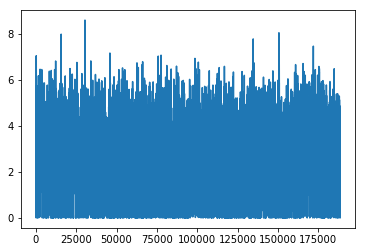

In [86]:
print(np.min(feature_matrix[:,feat_i]), np.max(feature_matrix[:,feat_i]))
plt.plot(feature_matrix[change_i,feat_i])

## Divide in 2 sets

In [87]:
A_idx = np.where(patient < 2500)[0]
features_A = feature_matrix[A_idx,:]
np.shape(features_A)

(94404, 9)

In [88]:
B_idx = np.where(patient >= 2500)[0]
features_B = feature_matrix[B_idx,:]
np.shape(features_B)

(94049, 9)

## Create an ESN

In [210]:
def sigmoid(x):
    exponent = 4
    x_out= np.zeros((len(x),1), dtype=np.double)
    for k in range(len(x)):
        if m.fabs(x[k])>150:
            x_out[k]=np.sign(x[k])*1
        else:    
            x_out[k] = 2*(m.exp(exponent*x[k]) / (1 + m.exp(exponent*x[k])))-1
    return (x_out)
#     return np.transpose(x_out)

def rectify(x):
    return np.array(x>0).astype(np.double)*x

func = sigmoid

In [211]:
x = np.copy(np.copy(ESN[1,:]))
exponent = 4
x_out= np.zeros((len(x),1), dtype=np.double)
for k in range(len(x)):
    if m.fabs(x[k])>150:
        x_out[k]=np.sign(x[k])*1
    else:    
        x_out[k] = 2*(np.exp(exponent*x[k]) / (1 + np.exp(exponent*x[k])))-1
x_out = (x_out)
print(np.shape(x_out))
x_out

(1000, 1)


array([[ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0.96402758],
       [ 0

In [212]:
a = np.linspace(-10, 10, 100, False)
print(np.shape(a))
print(len(a))

(100,)
100


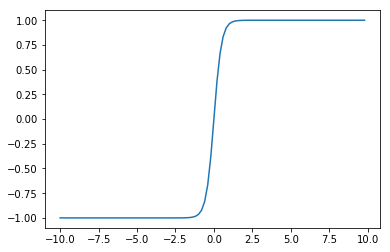

In [213]:
b = func(a)
plt.plot(a,b)

#### Create rand masks (input weight)
#### M⊂[-1,1]

In [214]:
N = 1000
M = 2*np.random.rand(np.shape(feature_matrix)[1],N)-1

In [215]:
dfeat = np.shape(features_A)[1]
dsamples = np.shape(features_A)[0]
mem = 0.2
scal = 0.5
ESN = np.ones((dsamples,N), dtype=np.double)
x = np.ones_like(ESN)
x = np.matmul(features_A,M,x)
print(np.shape(x))
print(np.shape(x[0,:]))
print(type(x[0,:]))
print(np.shape(x[0,:].reshape(1,-1)))
print(np.shape(ESN[0,:]))


(94404, 1000)
(1000,)
<class 'numpy.ndarray'>
(1, 1000)
(1000,)


In [220]:
# Get the ESN reservoir state
print(np.shape(x[0,:]))
print(np.shape(x[0,:].reshape(1,-1)))
print(np.shape(ESN[0,:]))


for i in range(2):
    if i ==0:
        p = np.zeros((1,N),dtype=np.double)
    ESN[i,:] = sigmoid(np.copy(scal*x[i,:] + mem*p).reshape(N)).flatten()
    p = (np.copy(ESN))
    p = np.roll(p,1)
#     print(ESN[i,:])
#     p = ESN[i,:]
#     p = np.copy(px)                   
#     p = np.roll(p,1) #TODO check roll shift


(1000,)
(1, 1000)
(1000,)


ValueError: cannot reshape array of size 94404000 into shape (1000,)

In [108]:
print(i)
# print(p)
# print(x[i,:])
print(np.max(x[i,:]))
sigmoid(150)

1
378.112483021


1.0

In [ ]:
# plt.plot(feature_matrix[:,feat_i])

In [ ]:
np.shape(ESN)

In [ ]:
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow((features_A[:1000,:]))
ax.set_title("Feat \n",loc='center')
ax.set_xlabel('feat')
ax.set_ylabel('sample')
np.min(features_A)

In [ ]:
fig, ax = plt.subplots(figsize=(13,10))
ax.matshow((ESN[:1000,:]))
ax.set_title("ESN \n",loc='center')
ax.set_xlabel('N')
ax.set_ylabel('sample')
np.min(ESN)

In [ ]:
ESNx = np.hstack((np.ones((dsamples,1),dtype=np.double),ESN ))

In [ ]:
ESNinv = np.linalg.pinv(ESNx)
I = np.matmul(ESNinv,ESNx)
plt.matshow(I)

In [ ]:
w = np.matmul(ESNinv,sepsis_label[A_idx])
len(w)

In [ ]:
plt.plot(w[1:])

In [ ]:
w[-1:]

In [ ]:
plt.plot(np.matmul(ESNx,w))

In [ ]:
plt.plot(sepsis_label[A_idx])